Vores idé til 04 projektet er en analyse af sammenhæng af løn og færdigheder ved brug af spilletFIFA’s datasæt. Der ønskes her at undersøge hvilke faktorer der påvirker den enkelte spillersløn, såsom klub, placering på banen og andre eventuelle faktorer som kan have en indflydelse pådette.Spillet FIFA har været populært siden 2010, hvorfra vi i gruppens syntes det kun være spændendeat kigge på nogen af disse data fra spillet. Men da spillet har ændret sig gennem tiden er alt dataikke ens og dermed ikke så medgørligt at arbejde med. Dog har vi fundt frem til følgende datasæt(link) på kaggle.com, som vi tænker at anvende, da der ligger flere års data, hvor data har samme attributter.

Text(0, 0.5, 'Salary (100 M)')

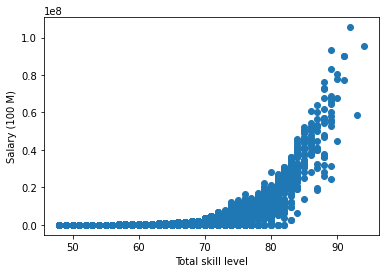

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./data/players_20.csv")

players = data.values.tolist()

playersSalary = [player[10] for player in players]
playersTotalSkill = [player[12] for player in players]

plt.scatter(playersSalary, playersTotalSkill)
plt.xlabel("Total skill level")
plt.ylabel("Salary (100 M)")

Som vist i ovenstående datasæt er der der mange ens lønninger baseret på deres forkellige niveauer. Derfor ønskes der nu at blive testet på lønninger der højere end 200.000

18278


Text(0, 0.5, 'Salary (100 M)')

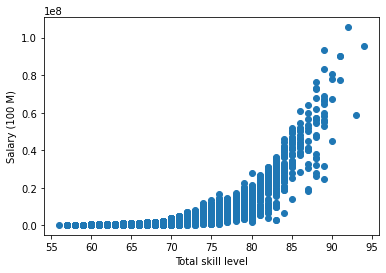

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./data/players_20.csv")

players = data.values.tolist()

print(len(players))

playersSalary = []
playersTotalSkill = []

for player in players:
     if player[12] > 200000:
        playersSalary.append(player[12])
        playersTotalSkill.append(player[10])
    
plt.scatter(playersTotalSkill, playersSalary)
plt.xlabel("Total skill level")
plt.ylabel("Salary (100 M)")

Tester man derimod når deres total niveau ligge mellem 70 og 85 får en 

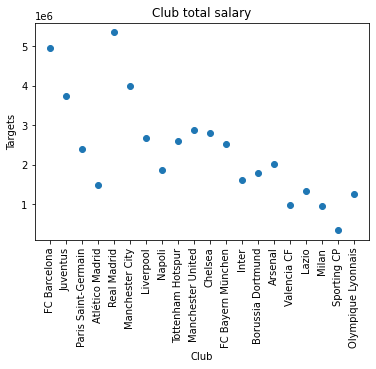

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from player import CSV, read_data, find, PlayerIndex, get

data = read_data(f"./data/{CSV.FIFA20.value}")

clubs = list(dict.fromkeys(get(data, PlayerIndex.club.value)))
wages: list = []

for club in clubs:
    players = find(data, PlayerIndex.club.value, club)
    wage = sum([player[PlayerIndex.wage_eur.value] for player in players])
    wages.append(wage)
    
plt.scatter(clubs[0:20], wages[0:20])
plt.title("Club total salary")
plt.xlabel("Club")
plt.ylabel("Targets")
plt.xticks(rotation=90)
plt.draw()




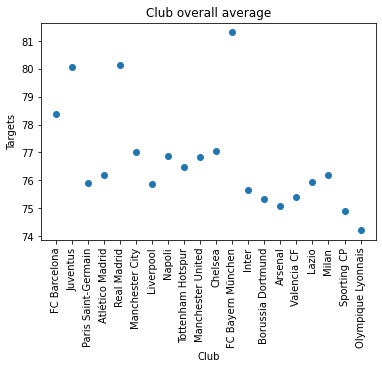

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from player import CSV, read_data, find, PlayerIndex, get

data = read_data(f"./data/{CSV.FIFA20.value}")

clubs = list(dict.fromkeys(get(data, PlayerIndex.club.value)))
overalls: list = []

for club in clubs:
    players = find(data, PlayerIndex.club.value, club)
    overall = sum([player[PlayerIndex.overall.value] for player in players]) / len(players)
    
model = np.polyfit(clubs[0], overall[0])
predict = np.poly1d(model)


plt.scatter(clubs[0:20], overalls[0:20])
plt.title("Club overall average")
plt.xlabel("Club")
plt.ylabel("Targets")
plt.xticks(rotation=90)
plt.draw()

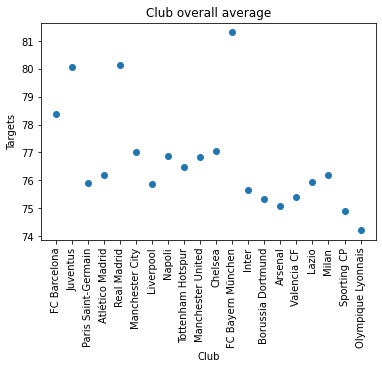

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from player import CSV, read_data, find, PlayerIndex, get

data = read_data(f"./data/{CSV.FIFA20.value}")

clubs = list(dict.fromkeys(get(data, PlayerIndex.club.value)))
overalls: list = []

for club in clubs:
    players = find(data, PlayerIndex.club.value, club)
    overall = sum([player[PlayerIndex.overall.value] for player in players]) / len(players)
    overalls.append(overall)

plt.scatter(clubs[0:20], overalls[0:20])
plt.title("Club overall average")
plt.xlabel("Club")
plt.ylabel("Targets")
plt.xticks(rotation=90)